# Классификация текстов


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.feature_extraction import text

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve

In [ ]:
cmaps = ['Accent','Accent_r','Blues','Blues_r','BrBG','BrBG_r','BuGn','BuGn_r',' BuPu','BuPu_r','CMRmap','CMRmap_r','Dark2','Dark2_r','GnBu','GnBu_r','Greens','Greens_r','Greys','Greys_r','OrRd',' OrRd_r','Oranges','Oranges_r','PRGn','PRGn_r','Paired','Paired_r','Pastel1',' Pastel1_r','Pastel2','Pastel2_r','PiYG','PiYG_r','PuBu','PuBuGn','PuBuGn_r',' PuBu_r','PuOr','PuOr_r','PuRd','PuRd_r','Purples','Purples_r','RdBu','RdBu_r',' RdGy','RdGy_r','RdPu','RdPu_r','RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Reds',' Reds_r','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral','Spectral_r',' Wistia','Wistia_r','YlGn','YlGnBu','YlGnBu_r','YlGn_r','YlOrBr','YlOrBr_r','YlOrRd',' YlOrRd_r','afmhot','afmhot_r','autumn','autumn_r','binary','binary_r','bone',' bone_r','brg','brg_r','bwr','bwr_r','cividis','cividis_r','cool','cool_r','coolwarm','coolwarm_r','copper','copper_r',' cubehelix','cubehelix_r','flag','flag_r','gist_earth','gist_earth_r','gist_gray','gist_gray_r','gist_heat','gist_heat_r','gist_ncar','gist_ncar_r',' gist_rainbow','gist_rainbow_r','gist_stern','gist_stern_r','gist_yarg',' gist_yarg_r','gnuplot','gnuplot2','gnuplot2_r','gnuplot_r','gray','gray_r',' hot','hot_r','hsv','hsv_r','icefire','icefire_r','inferno',' inferno_r','magma','magma_r','mako','mako_r',' nipy_spectral','nipy_spectral_r','ocean','ocean_r','pink','pink_r',' plasma','plasma_r','prism','prism_r','rainbow','rainbow_r',' rocket','rocket_r','seismic','seismic_r','spring','spring_r',' summer','summer_r','tab10','tab10_r','tab20','tab20_r','tab20b',' tab20b_r','tab20c','tab20c_r','terrain','terrain_r','twilight',' twilight_r','twilight_shifted','twilight_shifted_r','viridis','viridis_r','vlag','vlag_r','winter','winter_r']

Задания для выполнения
* Загрузите датасет 20 newsgroups;
* Познакомьтесь с описанием и структурой датасета. Описание можно найти в [документации](https://scikit-learn.org/stable/datasets/real_world.html?highlight=newsgroup#:~:text=7.2.2.%20The%2020%20newsgroups%20text%20dataset).
* Выведите информацию о количественных параметрах датасета;
* Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);
* Разделите эти данные на тестовую и обучающую выборки;
* Постройте модель наивного байесовского для классификации текстов;
* Оцените качество модели на тестовой выборке с помощью следующих метрик:
> * достоверность предсказания (accuracy);
> * точность (precision);
> * полнота (recall);

* Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.
* Сделайте вывод о применимости модели.

[Хабр](https://habr.com/ru/post/538458/)


Датасет 20 newsgroups - это один из известных модельных наборов данных для обучения методам классификации текстов на естественных языках. Его можно получить с помощью стандартных средств sklearn:

In [ ]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all',
                          remove=('footers', 'quotes'),)

In [ ]:
df_news = pd.DataFrame([news.data, news.target], index = ['data','target']).T
df_news['target_name'] = df_news.target.apply(lambda x: news.target_names[x])
df_news = df_news.reindex(columns=['data','target_name','target'])
df_news.head()

,data,target_name,target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,rec.sport.hockey,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,comp.sys.ibm.pc.hardware,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,talk.politics.mideast,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,comp.sys.ibm.pc.hardware,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,comp.sys.mac.hardware,4


In [ ]:
df_news_ml = df_news.iloc[np.where((df_news.target_name == 'rec.sport.baseball')+\
                                    (df_news.target_name == 'rec.autos')+\
                                    (df_news.target_name == 'rec.sport.hockey')+\
                                    (df_news.target_name == 'rec.motorcycles'))]

In [ ]:
df_news_ml.target_name.value_counts()

rec.sport.hockey      999
rec.motorcycles       996
rec.sport.baseball    994
rec.autos             990
Name: target_name, dtype: int64

In [ ]:
# df_news.groupby(by='target_name').count()

**Data Set Characteristics:**

    =================| |==========
    Classes          | |        20
    Samples total    | |     18846
    Dimensionality   | |         1
    Features         | |      text
    =================| |==========


Превращение текста в набор численных признаков - это сама по себе нетривиальная задача. Часто эту задачу называют векторизация текста. От применяемого метода векторизации очень сильно зависит эффективность методов машинного обучения (наверное, даже больше, чем от самих методов классификации).

В библиотеку sklearn встроены несколько простых методов векторизации текстов. Они собраны в модуле `sklearn.feature_extraction.text`. Более подробно о них можно почитать в [документации](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction).

Их применение довольно прямолинейно. Сначала нужно создать векторизатор, а затем преобразовать с помощью него текст в набор векторов:

In [ ]:
vectorizer = text.CountVectorizer()
X = vectorizer.fit_transform(df_news_ml.data)

In [ ]:
Y = df_news_ml.target.values.astype('int')
X.shape, Y.shape

((3979, 31173), (3979,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

Predict the **target** for **training data**

In [ ]:
metrics.accuracy_score(Y_train, model.predict(X_train)), \
metrics.precision_score(Y_train, model.predict(X_train), average='weighted'), \
metrics.recall_score(Y_train, model.predict(X_train), average='weighted')

(0.7646874018221803, 0.7675777989310111, 0.7646874018221803)

Predict the **target** for **test data**

In [ ]:
metrics.accuracy_score(Y_test, Y_pred), \
metrics.precision_score(Y_test, Y_pred, average='weighted'), \
metrics.recall_score(Y_test, Y_pred, average='weighted')

(0.6067839195979899, 0.6131972419263175, 0.6067839195979899)

Обратите внимание, что данный метод преобразования составляет словарь токенов текста. Поэтому если мы применим его на другой выборке у нас получится другой словарь. Чтобы преобразовать другую выборку на основе того же самого словаря нужно применить другой метод:


In [ ]:
methods = {'logistic regression': LogisticRegression(),
           'svc: linear kernel': svm.SVC(kernel='poly'),
           'svc: gauss kernel': svm.SVC(kernel='rbf'),
           'k neighbours': KNeighborsClassifier(),
           'mlp': MLPClassifier()}

In [ ]:
def classifier(method):
  model = methods[method]
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  methods_score[str(method)] = [metrics.accuracy_score(Y_test, Y_pred),
                                metrics.precision_score(Y_test, Y_pred, average='weighted'),
                                metrics.recall_score(Y_test, Y_pred, average='weighted')]

In [ ]:
methods_score = dict()
for method_name in methods.keys():
  classifier(method_name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.naive_bayes import MultinomialNB
{'gaussiannb': MultinomialNB()}

model = MultinomialNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
methods_score[str('gaussiannb')] = [metrics.accuracy_score(Y_test, Y_pred),
                                    metrics.precision_score(Y_test, Y_pred, average='weighted'),
                                    metrics.recall_score(Y_test, Y_pred, average='weighted')]

In [ ]:
methods_score = pd.DataFrame(methods_score.values(),
                             columns = ['accuracy','precision','recall'],
                             index = methods_score.keys())

In [ ]:
import seaborn as sns

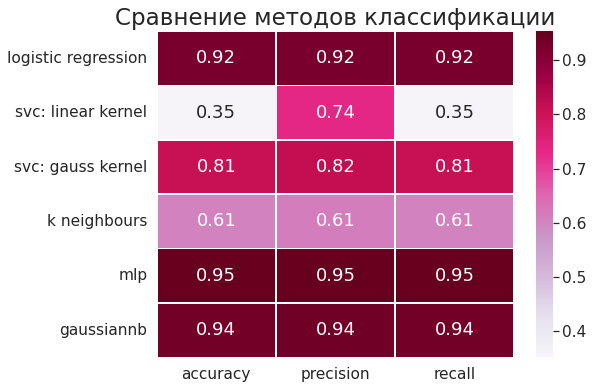

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
plt.title('Сравнение методов классификации', fontsize = 23)


sns.heatmap(methods_score, linewidths=.5, annot=True, annot_kws={'fontsize':18}, cmap=cmaps[40])

### Без remove

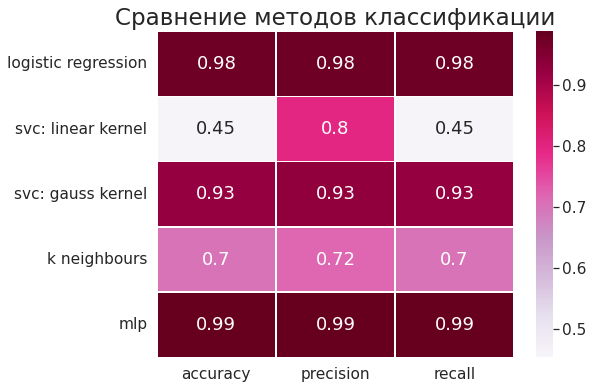

### Remove 'headers', 'footers', 'quotes'

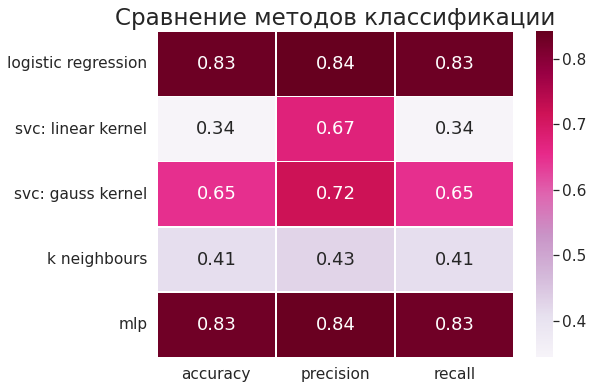

### Remove 'footers', 'quotes'

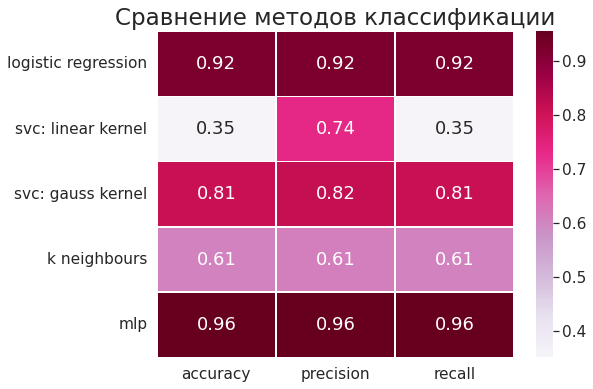

In [ ]:
import time

### Построим кривые обучения для различных методов

In [ ]:
def learning_curve_plot(i, method):
  start_time = time.time()
  train_sizes, train_scores, test_scores = learning_curve(methods[method],
                                                        X, Y,
                                                        # cv=10,
                                                        # scoring='accuracy',
                                                        # n_jobs=-1,
                                                        # train_sizes=np.linspace(0.01, 1.0, 50)
                                                        )
  print(f'{method}: {time.time() - start_time}')
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)

  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  ax[i].plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
  ax[i].plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

  ax[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
  ax[i].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

  ax[i].set_title(f"Learning Curve: {method}")
  ax[i].set_xlabel("Training Set Size"), ax[i].set_ylabel("Accuracy Score")
  plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(28,5))
plt.suptitle('Learning Curves for Different Classification Methods', y=1.05)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)
plt.legend(['Training score', 'Cross-validation score'], loc='lower center',bbox_to_anchor=(-2, -0.5))
plt.show()

* logistic regression: 44.393834590911865 s
* svc: linear kernel: 164.57906866073608 s
* svc: gauss kernel: 158.49079203605652 s
* k neighbours: 10.73823070526123 s
* mlp: 551.472980260849 s
* naive bayes: 0.590595006942749 s

In [ ]:
time_s = [44.393834590911865,164.57906866073608, 158.49079203605652, 10.73823070526123, 551.472980260849, 0.590595006942749]
list(map(lambda x: (str(int(x//60)) + ' min ' + str(round(x%60,2)) + ' s') ,time_s))

['0 min 44.39 s',
 '2 min 44.58 s',
 '2 min 38.49 s',
 '0 min 10.74 s',
 '9 min 11.47 s',
 '0 min 0.59 s']

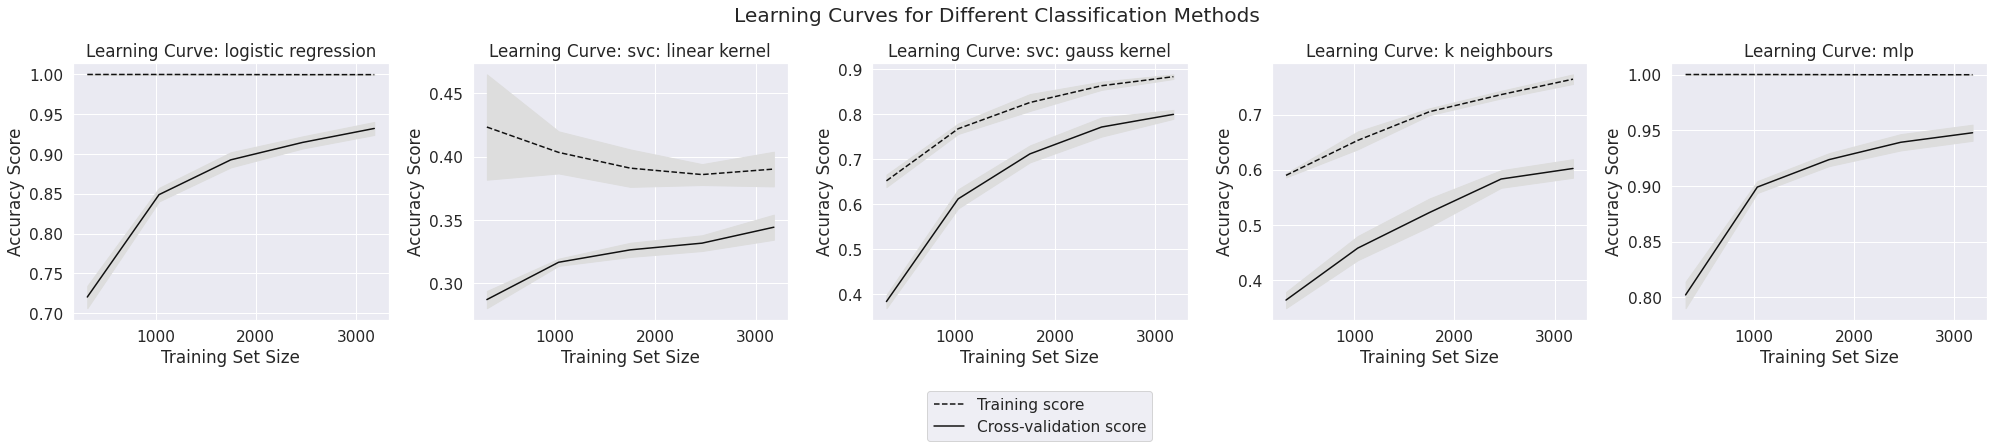

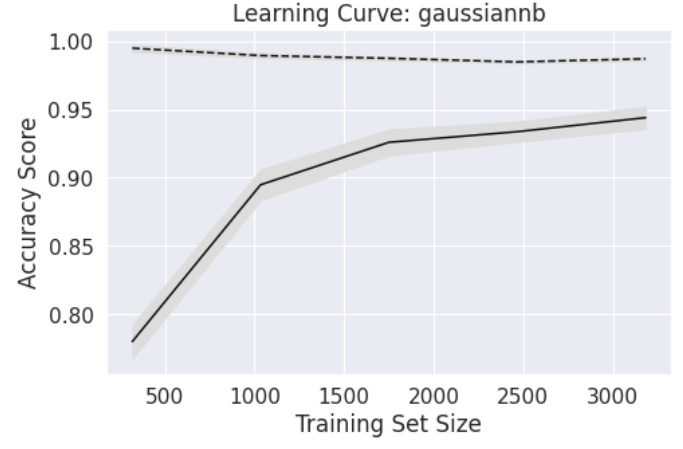


### Дополнительные задания
* Постройте модели классификации для данной задачи на основе следующих методов:
>* логистическая регрессия (LogisticRegression);
>* метод опорных векторов с гауссовым ядром (SVC);
>* метод опорных векторов с полиномиальным ядром (SVC);
>* метод k ближайших соседей (KNeighborsClassifier);
>* многослойный перцептрон (MLP);
>* другие методы по желанию;
* Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;
* Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.
* Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.
* (*) Используйте глубокую нейронную сеть для решения той же задачи. Сравните ее эффективность и производительность с классическими моделями.